This is to analysis best `take_profit` and `stop_loss` for scalping on GBPUSD_M5.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import talib as ta
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.pyplot import plot as plot
from numpy import inf, arange, array, linspace, exp, log, power, pi, cos, sin, radians, degrees
import pandas_datareader as pdr
from math import fabs

In [3]:
# read raw data frame
# sltp.csv is calculate result of sttp.py
df = pd.read_csv('data/GBPUSD_tick_M5_sltp.csv', header=0, index_col='time', parse_dates=True)
df.head()

,max_sell,max_buy,max_sell_interval,max_buy_interval
time,,,,
2018-12-02 22:00:00,0.0,0.0,0,0
2018-12-02 22:05:00,3.6,0.0,40,0
2018-12-02 22:10:00,6.3,0.0,35,0
2018-12-02 22:15:00,4.2,0.1,30,9
2018-12-02 22:20:00,4.7,3.2,25,4


In [5]:
# add hour column
time = pd.Series(df.index, index=df.index)
hours = time.apply(lambda x: x.hour)
df['hour'] = hours
df.head(2)

,max_sell,max_buy,max_sell_interval,max_buy_interval,hour
time,,,,,
2018-12-02 22:00:00,0.0,0.0,0,0,22
2018-12-02 22:05:00,3.6,0.0,40,0,22


In [6]:
# 
df2 = df.loc[df['hour'].isin([19, 20, 21])]
df2['max_sell'].describe()

count    672.000000
mean       6.131696
std        8.336451
min        0.000000
25%        1.300000
50%        4.000000
75%        7.700000
max       75.100000
Name: max_sell, dtype: float64

In [8]:
df2['max_buy'].describe()

count    672.000000
mean       5.181696
std        6.353518
min        0.000000
25%        0.700000
50%        3.300000
75%        6.800000
max       34.900000
Name: max_buy, dtype: float64

In [11]:
df3 = df.loc[df['hour'].isin([19, 20, 21])]
df3['max_sell'].describe()

count    672.000000
mean       6.131696
std        8.336451
min        0.000000
25%        1.300000
50%        4.000000
75%        7.700000
max       75.100000
Name: max_sell, dtype: float64

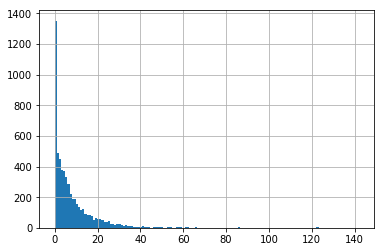

In [28]:
# hist diagram
max=int(df['max_sell'].describe()['max'])+1
df['max_sell'].hist(bins=max)
plt.show()

# Dicesion
Best `take_profit` is 5 pips
Best `stop_loss` is 8 pips